# Innomatics Reasearch Lab Internship Test Part 2 

## Machine Learning Hackathon

Code Author - Manoj Kumar




### Project - Perform proper analysis of the dataset and draw conclusions based on analysis.


## Import required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We need to import the required modules to perform the analysis of the dataset.

## Read the given dataset

In [2]:
data=pd.read_csv('E:\Mano@workspace\Datasets\dataframe_.csv')

In [3]:
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


Read and view the dataset to perform the proper analysis on the dataset.

## Data Tranforming & Analysing

Check the data contain any null values,wrong values or anything...

We need to find the errors in the dataset to transform the data to good state to preapre the analysis.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [5]:
data.isnull().sum()

input     1
output    1
dtype: int64

The given data contain one null value and we don't need that null value ,so we just drop that null values column using dropna() function in python to perform a proper analysis.

In [6]:
df=data.dropna()
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [7]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


## Visualization

Visualizing the data using matplotlib to get the graphical representation of the data and to check the data contains any outlier to remove them .

We store the input column data in x and output column data in y .

In [8]:
x=df['input']
x

0      -122.740667
1      -121.531419
2      -134.917019
3      -120.605951
4      -129.894781
           ...    
1692     25.410184
1693     29.537304
1694     31.633331
1695     29.091458
1696     17.145296
Name: input, Length: 1696, dtype: float64

In [9]:
y=df['output']
y

0      -130.572085
1      -129.938929
2      -130.141832
3      -125.760932
4      -112.785214
           ...    
1692    -76.380902
1693    -82.796934
1694    -87.000000
1695   -104.943052
1696   -101.726894
Name: output, Length: 1696, dtype: float64

We will visualize the data simply using matplotlib plot operation and name the plot and also giving name to x and y label for the good clarification about the data.

Text(0, 0.5, 'output')

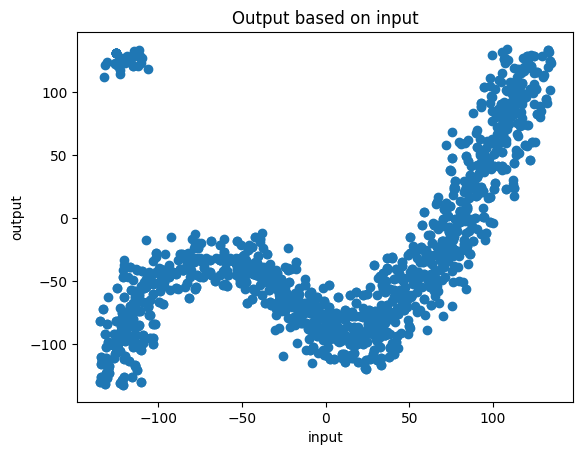

In [10]:
plt.plot(x,y,marker='o',ls='')
plt.title('Output based on input')
plt.xlabel('input')
plt.ylabel('output')

## Model Training

We will use the scikit-learn module to create a machine learning model.

Now ,i use the train_test_split function to train and test the x and y data to create a machine learning model.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [13]:
x_train

845    -131.021373
680     -18.075476
1578   -116.819920
177     -33.004135
1405     74.633331
           ...    
1130   -111.253677
1294    -12.408661
860    -120.812180
1460    103.818468
1126   -133.818175
Name: input, Length: 1187, dtype: float64

In [14]:
y_train

845    -102.422777
680     -84.610681
1578    -76.862918
177     -66.696221
1405    -15.000000
           ...    
1130    -85.090711
1294    -52.843621
860    -132.422167
1460     86.006248
1126   -127.063611
Name: output, Length: 1187, dtype: float64

In [15]:
x_test

618      29.881267
115     -50.899870
135     -34.004603
350     117.633331
1394     77.197188
           ...    
471     120.103012
322     100.633331
1232    -62.964466
1138   -122.366669
701     -29.646591
Name: input, Length: 509, dtype: float64

In [16]:
y_test

618     -81.760711
115     -51.665133
135     -57.318721
350     107.000000
1394    -25.284703
           ...    
471      95.910993
322      51.000000
1232    -45.240336
1138    -86.000000
701     -41.366189
Name: output, Length: 509, dtype: float64

## Outlier Detection the Treating the outlier

In [17]:
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

Reshaping the data to find the outlier and removing it from the data,we reshapimg the input data because we have 1 Dimensional array of x data ,so we need to reshape it for performing other operations without any error.

In [18]:
X=x.array.reshape(-1,1)
X

<PandasArray>
[
[-122.7406674],
[-121.5314194],
[-134.917019],
[-120.6059511],
[-129.8947807],
[-134.3666687],
[-115.5637388],
[-132.0801614],
[-133.3666687],
[-119.5241123],
[-125.743622],
[-133.3666687],
[-114.1008952],
[-131.3666687],
[-113.2783381],
[-133.8181748],
[-121.6535425],
[-127.3666687],
[-108.4996398],
[-111.2536771],
[-124.3666687],
[-119.1166023],
[-114.4105263],
[-122.3666687],
[-131.9053601],
[-109.2783685],
[-105.5046405],
[-122.3666687],
[-112.2579067],
[-111.0440481],
[-126.6376399],
[-120.3666687],
[-125.0856202],
[-103.409788],
[-115.2626373],
[-119.3666687],
[-104.9065286],
[-99.7125535],
[-117.3666687],
[-116.3328387],
[-125.3821591],
[-103.2199847],
[-115.3666687],
[-120.2750927],
[-113.2574809],
[-96.69835134],
[-115.3666687],
[-101.9974407],
[-111.9026024],
[-130.789929],
[-112.3666687],
[-98.94771821],
[-104.681987],
[-112.8669092],
[-110.3666687],
[-108.6044447],
[-96.69369402],
[-113.9676037],
[-109.3666687],
[-124.5036828],
[-117.2137042],
[-121.2046658]

Identifying outliers using IsolationForest function by using the x data that means input data and if we have outliers in the data then we need to remove the outliers to get the more accuracy on predicting the output data.

In [19]:
clf = IsolationForest(contamination=0.1)
clf.fit(X)
outlier_indexes =clf.predict(X)==-1

In [20]:
X_without_outliers = X[~outlier_indexes]
y_without_outliers = y[~outlier_indexes]

## Linear Regression Model Initializing 

We use the linear regression's regressor to create a model without outliers in the data.

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regressor = LinearRegression()

## The hyperparameter grid for grid search


By using Hyperparameter grid search we build a model using trained x,y data and regressor.

In [25]:
param_grid = {'fit_intercept': [True, False], 'n_jobs': [None, -1]}

In [26]:
grid_search = GridSearchCV(regressor, param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [None, -1]})

Printing the best hyperparameters used in the model.

In [27]:
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'fit_intercept': True, 'n_jobs': None}


## Testing the model

Finally we fit and test the model to get the predicted output based on input.

In [28]:
regressor = grid_search.best_estimator_
regressor.fit(X, y)

LinearRegression()

#### Predict the output for new input

Here we get the predicted output for the new input without outliers which given by the user.

In [31]:
new_input_str = input("Enter a new input value: ")
new_input = np.array([float(new_input_str)]).reshape(-1, 1)
prediction = regressor.predict(new_input)
print("Predicted output for the new input: ", prediction)

Enter a new input value: -129.8947807
Predicted output for the new input:  [-89.92315363]


## Summary of Analysis

The code above is a sample Python code for performing feature engineering and hyperparameter tuning on a 1D input and output data. The input and output data are represented as numpy arrays X and y, respectively.

The code first initializes a LinearRegression model from the scikit-learn library, which is a linear regression model for performing regression tasks.

Next, the code defines a hyperparameter grid using the param_grid dictionary, which specifies two hyperparameters to be tuned: fit_intercept and n_jobs. The fit_intercept hyperparameter specifies whether to include an intercept in the linear regression model, and the n_jobs hyperparameter specifies the number of CPU cores to use for the computation and we perform the grid search.

After the grid search is finished, the code prints the best hyperparameters found by the grid search using the best_params_ attribute of the grid_search object.

Finally, the code uses the best hyperparameters to train the LinearRegression model on the entire input data and make a prediction for a new input using the predict method of the trained model. The new input is specified as a numpy array new_input and the prediction result is stored in the prediction variable.

In conclusion, this code provides a simple example of how to perform feature engineering and hyperparameter tuning on a 1D input and output data using the LinearRegression model from scikit-learn.